In [13]:
# suppress tensorflow logging, usually not useful unless you are having problems with tensorflow or accessing gpu
# it seems necessary to have this environment variable set before tensorflow is imported, or else it doesn't take effect
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# imports generally useful throughout the notebook
# usually all imports should happen at the top of a notebook, but in
# these notebooks where the purpose is to show how to use the Keras API
# the relevant imports will happen in the cells where the API is discussed
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# global settings for notebook output and images
plt.rcParams['figure.figsize'] = (8, 8) # set default figure size, 10in by 8in
np.set_printoptions(precision=4, suppress=True)

In [14]:
# import project defined modules / functions used in this notebook
# ensure that the src directory where project modules are found is on
# the PYTHONPATH
import sys
sys.path.append("../src")

# assignment function imports for doctests and github autograding
# these are required for assignment autograding
from nndl import vectorize_samples, plot_history

ModuleNotFoundError: No module named 'nndl'

In [ ]:
# if want to restrict to cpu or gpu, configure visible device for rest of notebook to use
#dev = tf.config.list_physical_devices()
#print('Available Devices : ', dev)
#tf.config.set_visible_devices(dev[0], 'CPU')
#tf.config.set_visible_devices(dev[1], 'GPU')

In [11]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [12]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8118 - loss: 0.6111 - val_accuracy: 0.9119 - val_loss: 0.2943
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9225 - loss: 0.2515 - val_accuracy: 0.9388 - val_loss: 0.2021
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9497 - loss: 0.1646 - val_accuracy: 0.9559 - val_loss: 0.1502
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9639 - loss: 0.1158 - val_accuracy: 0.9492 - val_loss: 0.1669
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0852 - val_accuracy: 0.9663 - val_loss: 0.1154
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0625 - val_accuracy: 0.9624 - val_loss: 0.1326
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.9666 - val_loss: 0.1193
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0335 - val_accuracy: 0.

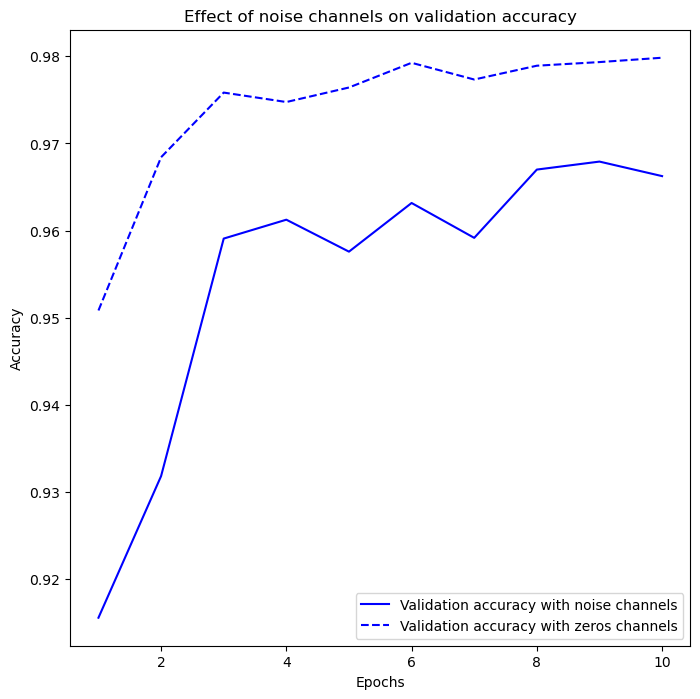

In [6]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

In [7]:
# get the mnist training data
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# copy the labels and randomly shuffle them
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)


model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# the validation_split will split 20% of the data and use
# it for loss validation
history = model.fit(train_images, random_train_labels,
                    epochs=100,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.1025 - loss: 2.3320 - val_accuracy: 0.1092 - val_loss: 2.3056
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1177 - loss: 2.2979 - val_accuracy: 0.1063 - val_loss: 2.3112
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1304 - loss: 2.2879 - val_accuracy: 0.1023 - val_loss: 2.3172
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1425 - loss: 2.2762 - val_accuracy: 0.1042 - val_loss: 2.3254
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1589 - loss: 2.2557 - val_accuracy: 0.1062 - val_loss: 2.3353
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1714 - loss: 2.2373 - val_accuracy: 0.0967 - val_loss: 2.3499
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1887 - loss: 2.2114 - val_accuracy: 0.1001 - val_loss: 2.3651
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2052 - loss: 2.1874 - val_accu

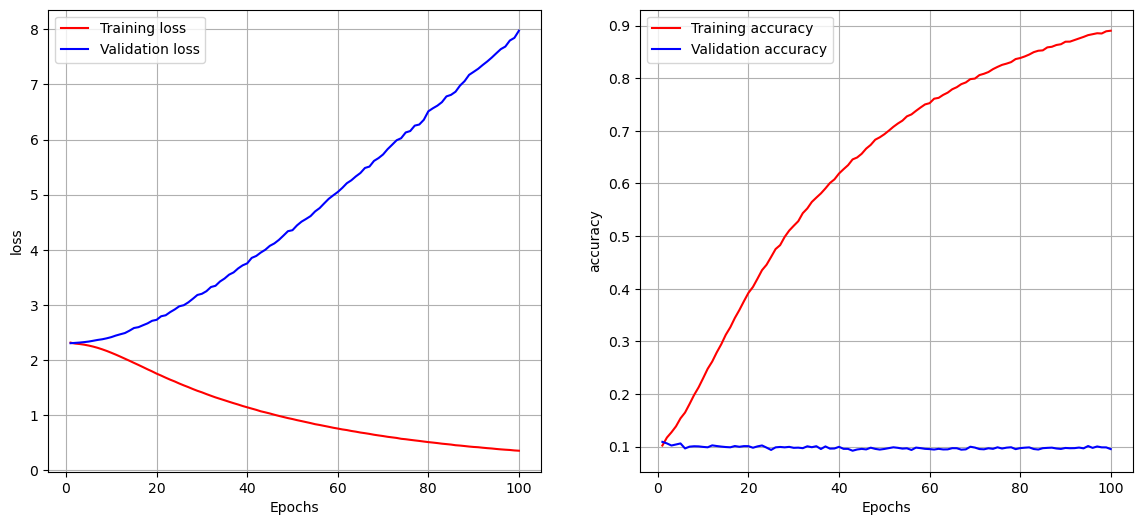

In [8]:
plt.figure(figsize=(14,6))
ax_loss = plt.subplot(1, 2, 1)
plot_history(ax_loss, history.history, 'loss')
ax_acc = plt.subplot(1, 2, 2)
plot_history(ax_acc, history.history, 'accuracy')